In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [5]:
ins = pd.read_csv(r'C:\Users\Batia\Downloads\insurance.csv')

In [6]:
ins.head()  

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
X = ins['age'].values
y = ins['charges'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




In [10]:
fit = LinearRegression().fit(x_train.reshape(-1,1), y_train)

In [11]:
predicted = fit.predict(x_test.reshape(-1,1))

In [12]:
predicted

array([14794.08786402, 12586.24456412, 19455.09038601, 15039.40378623,
        8415.87388655, 12095.6127197 ,  8415.87388655, 19455.09038601,
       10623.71718644, 15775.35155286, 11114.34903086, 13812.82417517,
       10869.03310865, 15039.40378623, 18473.82669717, 15284.71970844,
       15775.35155286, 15284.71970844, 15039.40378623, 14303.4560196 ,
        9887.76941981, 14303.4560196 ,  8415.87388655,  9151.82165318,
       16020.66747507, 17001.93116391, 18473.82669717, 10378.40126423,
       15284.71970844,  8170.55796434, 13567.50825296, 17737.87893054,
        8906.50573097, 11114.34903086, 10133.08534202, 14794.08786402,
        8906.50573097, 14303.4560196 , 16511.29931949, 12586.24456412,
        8415.87388655,  9151.82165318, 17492.56300833, 18228.51077496,
       11850.29679749, 18228.51077496,  8906.50573097,  9887.76941981,
       14303.4560196 , 11359.66495307, 19209.7744638 ,  8170.55796434,
       13567.50825296,  8170.55796434, 17492.56300833, 16020.66747507,
      

In [14]:
spejimai = pd.Series(predicted, name='Spejimas') ; spejimai
orig_rez = pd.Series(y_test, name='Originalus rezultatas') ; orig_rez

0       9095.06825
1       5272.17580
2      29330.98315
3       9301.89355
4      33750.29180
          ...     
437    18806.14547
438    11070.53500
439    10065.41300
440    24671.66334
441     1824.28540
Name: Originalus rezultatas, Length: 442, dtype: float64

In [15]:
res = pd.concat([orig_rez, spejimai], axis=1) ; res

,Originalus rezultatas,Spejimas
0,9095.06825,14794.087864
1,5272.17580,12586.244564
2,29330.98315,19455.090386
3,9301.89355,15039.403786
4,33750.29180,8415.873887
...,...,...
437,18806.14547,14303.456020
438,11070.53500,17492.563008
439,10065.41300,16756.615242
440,24671.66334,10133.085342


<Axes: xlabel='Originalus rezultatas', ylabel='Spejimas'>

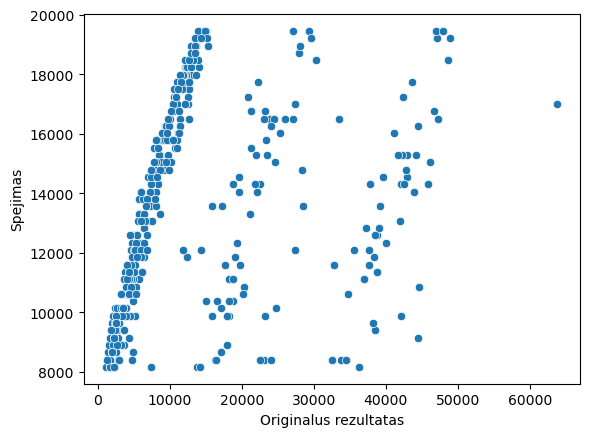

In [16]:
sns.scatterplot(x='Originalus rezultatas', y='Spejimas', data=res)

In [17]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
X = ins[['age', 'bmi', 'children']]
y = ins['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
fit = LinearRegression().fit(X_train, y_train)

In [20]:
predicted = fit.predict(X_test)

In [21]:
spejimai = pd.Series(predicted, name='Spejimas') ; spejimai

0      13579.609770
1      11744.155812
2      17097.387504
3      14656.906730
4       8492.898248
           ...     
437    16355.531560
438    14777.379945
439    13522.788560
440    12029.578384
441     9604.305863
Name: Spejimas, Length: 442, dtype: float64

In [22]:
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis=1) ; res

,charges,Spejimas
0,9095.06825,13579.609770
1,5272.17580,11744.155812
2,29330.98315,17097.387504
3,9301.89355,14656.906730
4,33750.29180,8492.898248
...,...,...
437,18806.14547,16355.531560
438,11070.53500,14777.379945
439,10065.41300,13522.788560
440,24671.66334,12029.578384


<Axes: xlabel='charges', ylabel='Spejimas'>

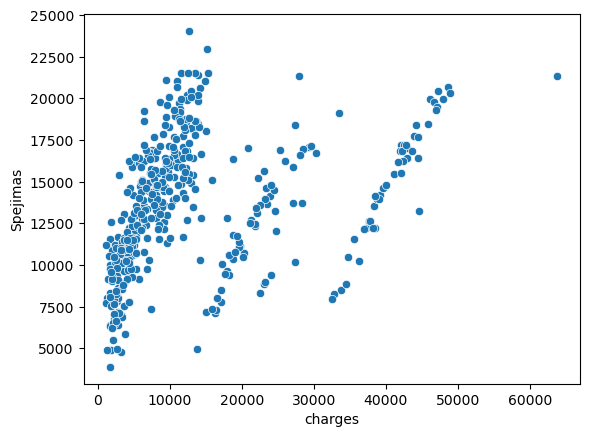

In [23]:
sns.scatterplot(x='charges', y='Spejimas', data=res)

In [33]:
fit.score(X_test, y_test)*100

75.87422388407032

In [27]:
sex = pd.get_dummies(ins['sex'])
ins2 = pd.concat([ins, sex], axis=1) ; ins2
ins3 = pd.concat([ins2, pd.get_dummies(ins['smoker'])], axis=1) ; ins3

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,False,True,True,False
2,28,male,33.000,3,no,southeast,4449.46200,False,True,True,False
3,33,male,22.705,0,no,northwest,21984.47061,False,True,True,False
4,32,male,28.880,0,no,northwest,3866.85520,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,False,True,True,False
1334,18,female,31.920,0,no,northeast,2205.98080,True,False,True,False
1335,18,female,36.850,0,no,southeast,1629.83350,True,False,True,False
1336,21,female,25.800,0,no,southwest,2007.94500,True,False,True,False


In [30]:
X = ins3.drop(columns=['sex', 'smoker', 'region', 'charges'])
y = ins3['charges'] ; X

,age,bmi,children,female,male,no,yes
0,19,27.900,0,True,False,False,True
1,18,33.770,1,False,True,True,False
2,28,33.000,3,False,True,True,False
3,33,22.705,0,False,True,True,False
4,32,28.880,0,False,True,True,False
...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False
1334,18,31.920,0,True,False,True,False
1335,18,36.850,0,True,False,True,False
1336,21,25.800,0,True,False,True,False


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

predicted = fit.predict(X_test)

spejimai = pd.Series(predicted, name='Spejimas') ; spejimai

res = pd.concat([y_test.reset_index(drop=True), spejimai], axis=1) ; res

,charges,Spejimas
0,9095.06825,8405.925660
1,5272.17580,6896.238685
2,29330.98315,36895.589824
3,9301.89355,9381.507922
4,33750.29180,26906.136525
...,...,...
437,18806.14547,11388.935926
438,11070.53500,10577.914765
439,10065.41300,9021.658138
440,24671.66334,5657.359755


<Axes: >

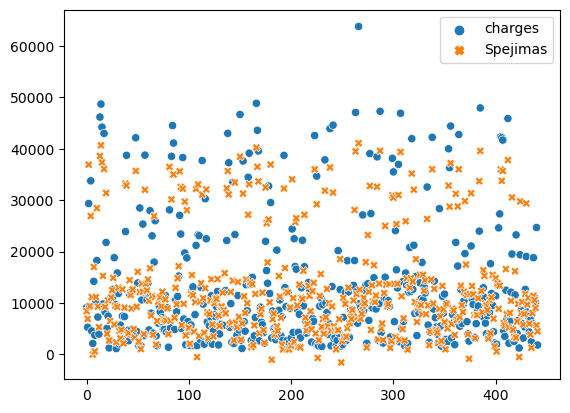

In [34]:
sns.scatterplot(data=res)

<Axes: xlabel='charges', ylabel='Spejimas'>

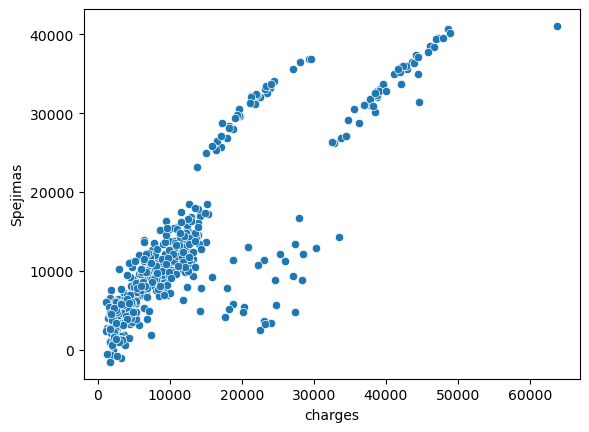

In [35]:
sns.scatterplot(x='charges', y='Spejimas', data=res)

In [37]:
X.columns

Index(['age', 'bmi', 'children', 'female', 'male', 'no', 'yes'], dtype='object')

In [40]:
fit.predict(np.reshape([19, 27.9, 0, 0, 1, 0, 1], (1, -1)))

c:\Users\Batia\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25572.94022531])

In [41]:
mpg = sns.load_dataset('mpg') ; mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
# Naudojamas seaborn pateikiamas duomenų rinkinys. Užduotis:
# Sukurti tiesinės regresijos modelį, kuris prognozuotų automobilio
# degalų suvartojimą (mpg - miles per gallon).


# Pridėkite vartotojo įvestį, kuri leistų įvesti automobilio duomenis ir gauti prognozę.

In [62]:
origin = pd.get_dummies(mpg['origin'] , dtype=int) 
mpg2 = pd.concat([mpg, origin], axis=1) ; mpg2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0,0,1


In [70]:

mpg2 = mpg2.dropna(subset=['weight', 'horsepower', 'mpg', 'origin' , 'displacement']) ; mpg2

X = mpg2[['weight', 'horsepower', 'europe', 'japan', 'usa', 'displacement', 'acceleration', 'cylinders', 'model_year']]
y = mpg2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

predicted = fit.predict(X_test)

spejimai = pd.Series(predicted, name='Spejimas') ; spejimai

res = pd.concat([y_test.reset_index(drop=True), spejimai], axis=1) ; res

,mpg,Spejimas
0,26.0,27.356332
1,21.6,27.057310
2,36.1,34.524493
3,26.0,24.684753
4,27.0,28.042054
...,...,...
125,24.5,24.766810
126,29.0,28.546529
127,30.5,30.606134
128,15.0,21.241287


<Axes: >

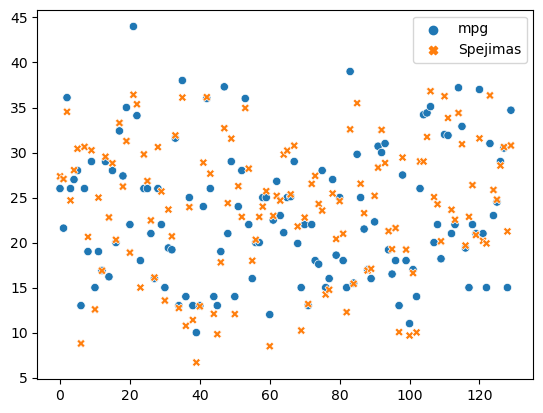

In [72]:
sns.scatterplot(data=res)

In [71]:
fit.score(X_test, y_test)*100

79.64817032975559

In [47]:
def predict_mpg(weight, horsepower):
    
    input_data = pd.DataFrame({'weight': [weight], 'horsepower': [horsepower]})
    prediction = fit.predict(input_data)[0]
    return prediction


print("mpg")
weight_input = float(input("Enter weight: "))
horsepower_input = float(input("Enter horsepower: "))


predicted_mpg = predict_mpg(weight_input, horsepower_input)
print(predicted_mpg)

mpg
19.280093673134196


In [ ]:
# Turime lentelę su 7-niomis žuvų rūšim, bei įvairiais jų
# išmatavimais. Vienas iš jų yra svoris (weight) - tai bus target
# stulpelis. Sukurkite tiesinės regresijos modelį, kuris pagal kitus
# lentelės stulpelius spėlios žuvies svorį.

In [49]:
zuvis = pd.read_csv(r'C:\Users\Batia\Desktop\Fish.csv')

In [50]:
zuvis

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


<Axes: >

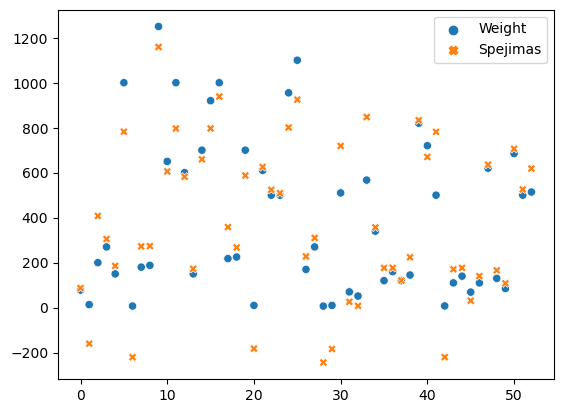

In [51]:
X = zuvis.drop(columns=['Weight', 'Species'])
y = zuvis['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

predicted = fit.predict(X_test)

spejimai = pd.Series(predicted, name='Spejimas') ; spejimai

res = pd.concat([y_test.reset_index(drop=True), spejimai], axis=1) ; res

sns.scatterplot(data=res)

In [52]:
fit.score(X_test, y_test)*100

87.20898935550834

In [53]:
zuvis['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [54]:
zuvis['Species'].astype('category').cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Length: 159, dtype: int8

<Axes: >

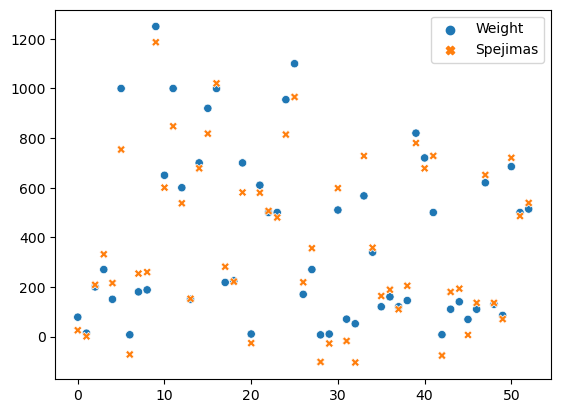

In [57]:
X = zuvis.drop(columns=['Weight', 'Species'])
y = zuvis['Weight']

X = pd.concat([X, pd.get_dummies(zuvis['Species'])], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

predicted = fit.predict(X_test)

spejimai = pd.Series(predicted, name='Spejimas') ; spejimai

res = pd.concat([y_test.reset_index(drop=True), spejimai], axis=1) ; res

sns.scatterplot(data=res)

In [58]:
fit.score(X_test, y_test)*100

94.05192628555376

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# scores = cross_validate(model, X, y, cv=10, scoring=('r2', 'max_error'))

In [ ]:
scores = cross_val_score(model, X, y, cv=10)

In [ ]:
# a) Parašyti kainos prognozės skriptą, kuris prognozuotų būsto kainą. Naudoti Liearregression
# kategorines vertes užkoduoti su LabelEncoder'iu
# b) iš autoplius duomenų, pasirinkti 7-8 parametrus ir parašyti skriptą automobilio vertės nustatymui.
# Įvertinkite tikslumaą su score parametru

In [ ]:
# df = pd.read_csv('aruodas.db')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 31: invalid start byte

In [ ]:
import sqlite3


conn = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\aruodas.db")


dfI = pd.read_sql("SELECT * FROM listings", conn)


conn.close()

In [139]:
dfI

,price,plotas,kambariu_sk,aukstas,aukstu_sk,metai,pastato_tipas,sildymas,irengimas,energijos_klase,amzius
0,205000,66.64,2,3,5,2003.0,5,6,5,0,21.0
1,250000,49.36,2,1,2,2020.0,5,0,5,9,4.0
2,268000,35.00,2,1,3,2023.0,2,7,5,3,1.0
3,163000,67.00,3,8,12,2008.0,0,7,5,9,16.0
4,131000,50.00,2,12,12,2005.0,5,7,5,9,19.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,183500,58.00,3,2,4,2024.0,5,7,5,1,0.0
4996,148500,79.00,4,3,9,2024.0,5,7,0,3,0.0
4997,47500,20.00,1,7,12,1976.0,5,6,5,9,48.0
4998,185000,85.00,4,4,11,2023.0,5,7,5,3,1.0


In [134]:
dfI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5000 non-null   int64  
 1   address          5000 non-null   object 
 2   price            5000 non-null   int64  
 3   namo_numeris     5000 non-null   object 
 4   buto_numeris     5000 non-null   object 
 5   plotas           5000 non-null   float64
 6   kambariu_sk      5000 non-null   int64  
 7   aukstas          5000 non-null   int64  
 8   aukstu_sk        5000 non-null   int64  
 9   metai            5000 non-null   object 
 10  pastato_tipas    5000 non-null   int32  
 11  sildymas         5000 non-null   int32  
 12  irengimas        5000 non-null   int32  
 13  energijos_klase  5000 non-null   int32  
dtypes: float64(1), int32(4), int64(5), object(4)
memory usage: 468.9+ KB


In [97]:
dfI.isnull().values.sum()

0

In [143]:
dfI = dfI.dropna()

In [99]:
from sklearn.preprocessing import LabelEncoder

In [103]:
dfI['pastato_tipas'].unique()
dfI['energijos_klase'].unique()

array(['A', 'N/A', 'B', 'A++', 'A+', 'G', 'C', 'F', 'D', 'E'],
      dtype=object)

In [123]:
dfI['pastato_tipas'] = LabelEncoder().fit_transform(dfI['pastato_tipas'])

In [124]:
dfI['energijos_klase'] = LabelEncoder().fit_transform(dfI['energijos_klase'])

In [125]:
dfI['sildymas'] = LabelEncoder().fit_transform(dfI['sildymas'])

In [126]:
dfI['irengimas'] = LabelEncoder().fit_transform(dfI['irengimas'])

In [127]:
dfI['plotas'] = dfI['plotas'].str.replace(' m²', '').str.replace(',','.')
dfI['plotas'] = pd.to_numeric(dfI['plotas'], errors='coerce').fillna(0)

In [121]:
dfI['price'] = dfI['price'].str.replace(' €', '').str.replace(' ','')
dfI['price'] = pd.to_numeric(dfI['price'], errors='coerce').fillna(0)

In [ ]:
dfI['kambariu_sk'] = pd.to_numeric(dfI['kambariu_sk'], errors='coerce').fillna(0)
dfI['aukstu_sk'] = pd.to_numeric(dfI['aukstu_sk'], errors='coerce').fillna(0)


In [135]:
dfI = dfI.drop(columns=['id', 'address', 'namo_numeris', 'buto_numeris' ])

In [141]:
dfI['metai'] = pd.to_numeric(dfI['metai'], errors='coerce')
dfI['amzius'] = pd.Timestamp.now().year - dfI['metai']

<Axes: >

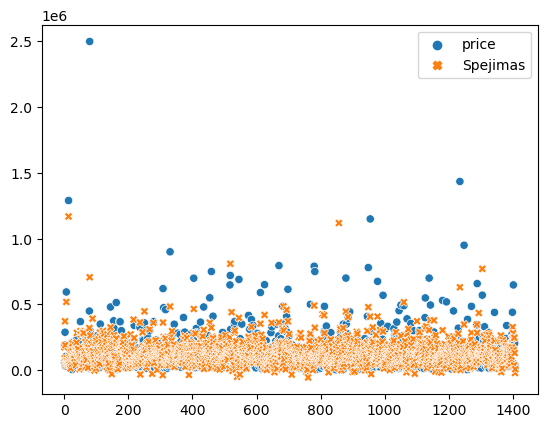

In [144]:
X = dfI[['plotas', 'kambariu_sk', 'aukstu_sk', 'pastato_tipas', 'energijos_klase', 'sildymas', 'irengimas', 'amzius']]
y = dfI['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

predicted = fit.predict(X_test)

spejimai = pd.Series(predicted, name='Spejimas') ; spejimai

res = pd.concat([y_test.reset_index(drop=True), spejimai], axis=1) ; res

sns.scatterplot(data=res)

In [147]:
fit.score(X_test, y_test)*100

46.18246441474045

In [146]:
def predict_price(plotas, kambariu_sk, aukstu_sk, pastato_tipas, energijos_klase, sildymas, irengimas, amzius):
    
    input_data = pd.DataFrame({'plotas': [plotas], 'kambariu_sk': [kambariu_sk], 'aukstu_sk': [aukstu_sk], 'pastato_tipas': [pastato_tipas], 'energijos_klase': [energijos_klase], 'sildymas': [sildymas], 'irengimas': [irengimas], 'amzius': [amzius]})
    prediction = fit.predict(input_data)[0]
    return prediction

# print("price")
plotas_input = float(input("Enter plotas: "))
kambariu_sk_input = float(input("Enter kambariu_sk: "))
aukstu_sk_input = float(input("Enter aukstu_sk: "))
pastato_tipas_input = float(input("Enter pastato_tipas: "))
energijos_klase_input = float(input("Enter energijos_klase: "))
sildymas_input = float(input("Enter sildymas: "))
irengimas_input = float(input("Enter irengimas: "))
amzius_input = float(input("Enter amzius: "))
predicted_price = predict_price(plotas_input, kambariu_sk_input, aukstu_sk_input, pastato_tipas_input, energijos_klase_input, sildymas_input, irengimas_input, amzius_input)
print(predicted_price)

98619.16893762976


In [ ]:
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(data)
print('Category Mapping:', dict(zip(data, encoded_data)))

In [ ]:
# b) iš autoplius duomenų, pasirinkti 7-8 parametrus ir parašyti skriptą automobilio vertės nustatymui.
# Įvertinkite tikslumaą su score parametru

In [149]:
conn = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\cars1.db")


dfII = pd.read_sql("SELECT * FROM car_listings", conn)


conn.close()

In [173]:
dfII

,brand,model,price,seller,location,phone,registration_year,mileage,engine,fuel_type,body_type,doors,transmission,color,tech_check,wheel_size,seats,co2_emission,amzius
0,2,428 Gran Coupe,18 000 €,Privatus pardavėjas,"Klaipėda, Lietuva",+37068744028,2015.0,199000,180,1,7,4/5,1,Balta,,,5,~ 147 g/km,9.0
1,2,530,26 900 €,Privatus pardavėjas,"Klaipėda, Lietuva",+37067780732,2019.0,46000,185,1,10,4/5,1,Pilka / sidabrinė,2026-07,R20,5,~ 126 g/km,5.0
2,52,Golf,7 100 €,Privatus pardavėjas,"Alytus, Lietuva",+37068875994,NaN,314086,77,5,11,4/5,1,,,R16,5,104 g/km,NaN
3,13,500X,10 500 €,Privatus pardavėjas,"Kaunas, Lietuva",+37068731000,2016.0,126211,130,2,13,4/5,1,Pilka / sidabrinė,2026-10,R18,5,,8.0
4,2,320 Gran Turismo,14 500 €,Privatus pardavėjas,"Kėdainiai, Lietuva",+37064227171,NaN,162000,140,5,1,4/5,2,Juoda,2025-09,,5,120 g/km,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,17,i20,2 850 €,Pardavėjas,"Tauragė, Lietuva",+37066448825,NaN,192000,55,5,1,4/5,2,Balta,,,5,~ 99 g/km,NaN
6189,8,DS3,2 850 €,Pardavėjas,"Ukmergė, Lietuva",+37066387557,NaN,89652,85,5,1,2/3,2,,,,5,99 g/km,NaN
6190,52,Touran,2 850 €,Pardavėjas,"Kaišiadorys, Lietuva",+37060029637,NaN,320321,77,5,12,4/5,2,Mėlyna / žydra,2025-02,,5,131 g/km,NaN
6191,51,Auris,2 890 €,"AUTOLYGIS, UAB","Klaipėda, Lietuva",+37068788729,NaN,290000,65,5,1,4/5,2,Pilka / sidabrinė,2026-09,R16,5,,NaN


In [176]:
dfII.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              6193 non-null   int32  
 1   model              6193 non-null   object 
 2   price              6193 non-null   object 
 3   seller             6193 non-null   object 
 4   location           6193 non-null   object 
 5   phone              6193 non-null   object 
 6   registration_year  664 non-null    float64
 7   mileage            6193 non-null   object 
 8   engine             5959 non-null   object 
 9   fuel_type          6193 non-null   int32  
 10  body_type          6193 non-null   int32  
 11  doors              6193 non-null   object 
 12  transmission       6193 non-null   int32  
 13  color              6193 non-null   object 
 14  tech_check         6193 non-null   object 
 15  wheel_size         6193 non-null   object 
 16  seats              6193 

In [152]:
dfII.isnull().values.sum()

0

In [181]:
dfII = dfII.dropna()

In [153]:
dfII['transmission'] = LabelEncoder().fit_transform(dfII['transmission'])

In [154]:
dfII['fuel_type'] = LabelEncoder().fit_transform(dfII['fuel_type'])

In [155]:
dfII['body_type'] = LabelEncoder().fit_transform(dfII['body_type'])

In [156]:
dfII['brand'] = LabelEncoder().fit_transform(dfII['brand'])

In [163]:
dfII['registration_year'] = pd.to_datetime(dfII['registration_year'], errors='coerce').dt.year

In [165]:
dfII['amzius'] = pd.Timestamp.now().year - dfII['registration_year']

In [177]:
dfII['mileage'] = dfII['mileage'].str.replace(' km', '').str.replace(' ','')
dfII['mileage'] = pd.to_numeric(dfII['mileage'], errors='coerce').fillna(0)

In [178]:
dfII['engine'] = dfII['engine'].str.replace('kW)', '').str.split('(').str[1]
dfII['engine'] = pd.to_numeric(dfII['engine'], errors='coerce').fillna(0)

In [179]:
dfII['price'] = dfII['price'].str.replace(' €', '').str.replace(' ','')
dfII['price'] = pd.to_numeric(dfII['price'], errors='coerce').fillna(0)

<Axes: >

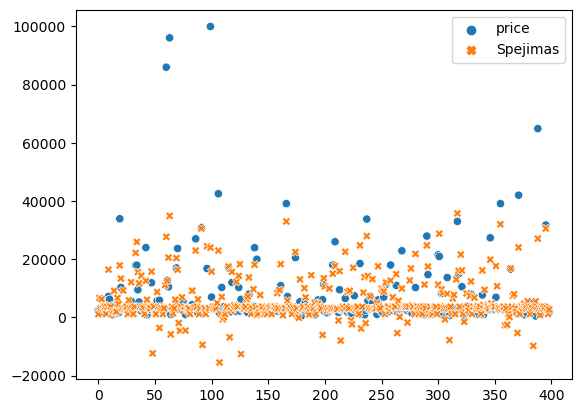

In [188]:
X = dfII[['transmission', 'fuel_type', 'body_type', 'brand', 'registration_year', 'amzius', 'mileage', 'engine']]
y = dfII['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

predicted = fit.predict(X_test)

spejimai = pd.Series(predicted, name='Spejimas') ; spejimai

res = pd.concat([y_test.reset_index(drop=True), spejimai], axis=1) ; res

sns.scatterplot(data=res)

In [189]:
fit.score(X_test, y_test)*100

45.97108127229406

In [185]:
def predict_price(transmission, fuel_type, body_type, brand, registration_year, amzius, mileage, engine):
    
    input_data = pd.DataFrame({'transmission': [transmission], 'fuel_type': [fuel_type], 'body_type': [body_type], 'brand': [brand], 'registration_year': [registration_year], 'amzius': [amzius], 'mileage': [mileage], 'engine': [engine]})
    prediction = fit.predict(input_data)[0]
    return prediction



transmission_input = float(input("Enter transmission: "))
fuel_type_input = float(input("Enter fuel_type: "))
body_type_input = float(input("Enter body_type: "))
brand_input = float(input("Enter brand: "))
amzius_input = float(input("Enter amzius: "))
mileage_input = float(input("Enter mileage: "))
engine_input = float(input("Enter engine: "))
predicted_price = predict_price(transmission_input, fuel_type_input, body_type_input, brand_input, amzius_input, mileage_input, engine_input)
print(predicted_price)


KeyboardInterrupt: Interrupted by user